# Adaline

In [ ]:
#IGNORAR
'''
import numpy as np

w = [-0.5441, 0.5562, -0.4074]
x = [[-1, 2, 2], [-1, 4, 4]]
y = [1, 0]

def func(u):
  if u < 1:
    return 0
  elif u > 1:
    return 1

def u(x, w, y):
  for i in range(len(y)):
    result = x[i][0] * w[0] + x[i][1] * w[1] + x[i][2] * w[2]
    test = func(result)
    if test != y[i]:
      return test

def weight(u):
  new_weight =
'''

In [1]:
import numpy as np
def known_function(x):
    f1 = lambda x : np.sin(x)
    f2 = lambda x : np.cos(x)
    f3 = lambda x : x
    a1 = 0.565
    a2 = 2.657
    a3 = 0.674
    a0 = -(np.pi)
    return a0 + a1*f1(x) + a2*f2(x) + a3*f3(x)

In [3]:
import numpy as np
random_values = np.linspace(0, 2 * np.pi, 20)

In [4]:
image_function = lambda x: known_function(x)
y = image_function(random_values)

In [ ]:
#x = random_values.reshape(-1, 1)

In [ ]:
#x = np.hstack((np.ones((x.shape[0], 1)), x))

In [5]:
x = np.vstack((
    np.ones_like(random_values),
    random_values,
    np.sin(random_values),
    np.cos(random_values)
)).T


In [6]:
y = y.reshape(-1, 1)

In [7]:
weights = np.random.randn(x.shape[1], 1) # pesos aleatorios

In [8]:
eta = 0.01

In [9]:
def adaline(x, y, weights, eta, epochs):
    for _ in range(epochs):
        y_predito = x @ weights
        error = y - y_predito
        weights += eta * x.T @ error / x.shape[0]
    return weights

In [10]:
model_trained = adaline(x, y, weights, eta, epochs=1000)

In [11]:
def predict(X, weights):
    return X @ weights

y_pred = predict(x, model_trained)

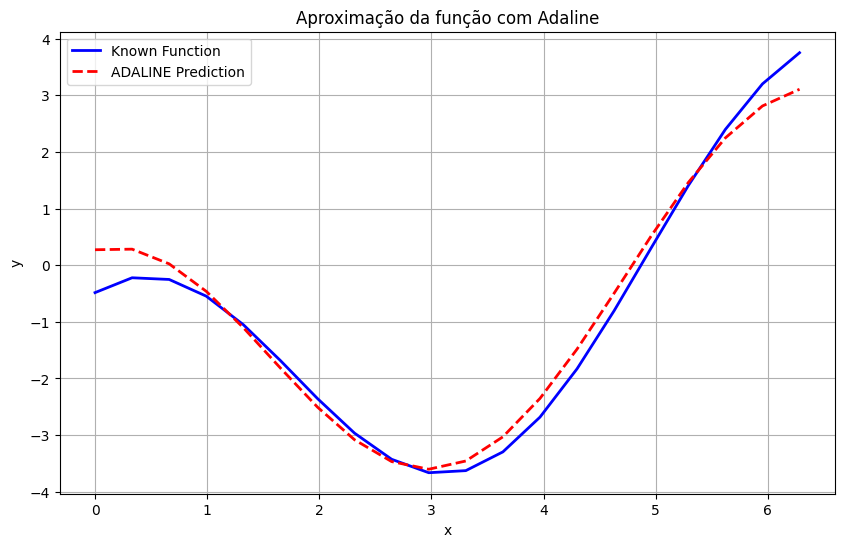

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # opcional: define o tamanho do gráfico

plt.plot(random_values, y, label='Known Function', color='blue', linewidth=2)
plt.plot(random_values, y_pred, label='ADALINE Prediction', color='red', linestyle='--', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximação da função com Adaline')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import numpy as np
Teste_random_values = np.linspace(0, 4 * np.pi, 100)
Teste_x = np.vstack((
    np.ones_like(Teste_random_values),
    Teste_random_values,
    np.sin(Teste_random_values),
    np.cos(Teste_random_values)
)).T

image_function = lambda x: known_function(Teste_x)
Teste_y = image_function(Teste_x)
Teste_y_pred = predict(Teste_x, model_trained)

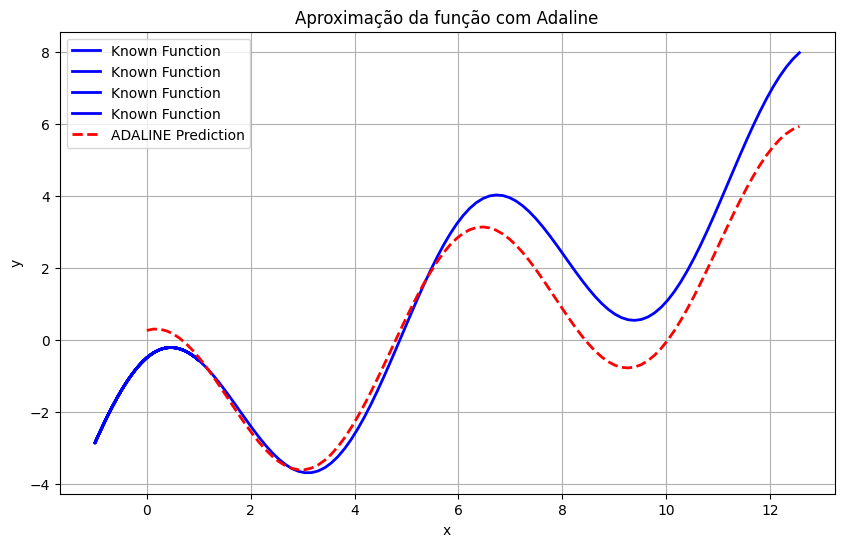

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # opcional: define o tamanho do gráfico

plt.plot(Teste_x, Teste_y, label='Known Function', color='blue', linewidth=2)
plt.plot(Teste_random_values, Teste_y_pred, label='ADALINE Prediction', color='red', linestyle='--', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximação da função com Adaline')
plt.legend()
plt.grid(True)
plt.show()


# Multilayer Perceptron

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/PJbourne/IA-course-tasks/refs/heads/main/auto-mpg.csv')

In [ ]:
dataset.head()

In [ ]:
plt.scatter(dataset[['weight']], dataset[['mpg']])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')
plt.title('Weight vs MPG')
plt.show()

In [ ]:
x = dataset[['weight']] * 0.453592
y = dataset[['mpg']] * 0.425144

In [ ]:
print(x.describe())
print(y.describe())

In [ ]:
escala = StandardScaler()
escala.fit(x)
x_scaled = escala.transform(x)

In [ ]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [ ]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                   max_iter=2000, 
                   tol=0.0000001,
                   learning_rate_init=0.1,
                   solver='sgd',
                   activation='logistic',
                   learning_rate='constant',
                   verbose=2
                   )

In [ ]:
rna.fit(x_scaled_train, y_train)

In [ ]:
reglinear = SGDRegressor(max_iter=2000,
                         tol=0.0000001,
                         eta0=0.1,
                         learning_rate='constant',
                         verbose=2
                         )

In [ ]:
reglinear.fit(x_scaled_train, y_train)

In [ ]:
y_rna_previsao = rna.predict(x_scaled_test)
y_rl_previsao = reglinear.predict(x_scaled_test)

In [ ]:
#calc r^2
r2_rna = r2_score(y_test, y_rna_previsao)
r2_rl = r2_score(y_test, y_rl_previsao)
print(f'R^2 RNA: {r2_rna}')
print(f'R^2 Regressão Linear: {r2_rl}')

In [ ]:
x_test = escala.inverse_transform(x_scaled_test)
plt.scatter(x_test, y_test, alpha=0.5, label='Real')
plt.scatter(x_test, y_rna_previsao, alpha=0.5, label='RNA')
plt.scatter(x_test, y_rl_previsao, alpha=0.5, label='Regressão Linear')
plt.ylabel('Miles per gallon')
plt.title('Previsão de MPG')
plt.xlabel('Weight')
plt.legend(loc=1)

In [ ]:
rna2 = MLPRegressor(hidden_layer_sizes=(50, 25, 10),
                   max_iter=2000, 
                   tol=0.00000001,
                   learning_rate_init=0.1,
                   solver='sgd',
                   activation='relu',
                   learning_rate='constant',
                   verbose=2
                   )

In [ ]:
rna2.fit(x_scaled_train, y_train)

In [ ]:
y_rna2_previsao = rna2.predict(x_scaled_test)
r2_rna2 = r2_score(y_test, y_rna2_previsao)

In [ ]:
r2_rna2 = r2_score(y_test, y_rna2_previsao)
print(f'R^2 RNA: {r2_rna}')
print(f'R^2 RNA2: {r2_rna2}')

In [ ]:
import numpy as np
x_futuro = np.array([[1250, 1300]])
x_futuro_scaled = escala.transform(x_futuro.T)

In [ ]:
y_rna_prev_futuro = rna.predict(x_futuro_scaled)
y_reglinear_prev_futuro = reglinear.predict(x_futuro_scaled)

In [ ]:
print(f'Previsão RNA: {y_rna_prev_futuro}')
print(f'Previsão Regressão Linear: {y_reglinear_prev_futuro}')